In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [73]:
file = 'training_set.csv'
df = pd.read_csv(file, encoding = 'unicode_escape')
df.head()

,Engagements,Followers at Posting,Created,Type,Description
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...


In [74]:
df.shape

(7766, 5)

In [75]:
df.isnull().sum()

Engagements              0
Followers at Posting     0
Created                  0
Type                     0
Description             14
dtype: int64

In [76]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['engagements', 'followers at posting', 'created', 'type',
       'description'],
      dtype='object')

In [77]:
df['followers'] = df['followers at posting']

In [78]:
df.dtypes

engagements              int64
followers at posting     int64
created                 object
type                    object
description             object
followers                int64
dtype: object

In [79]:
df['created'] = pd.to_datetime(df.created)

In [80]:
df.head()

,engagements,followers at posting,created,type,description,followers
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,36984682
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,36984682
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,36984682
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,36984682
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,36984682


In [81]:
df['year'], df['month'], df['dow'], df['hour'] = df.created.dt.year, df.created.dt.month, df.created.dt.weekday_name, df.created.dt.hour
df.head()

,engagements,followers at posting,created,type,description,followers,year,month,dow,hour
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,36984682,2019,5,Wednesday,3
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,36984682,2019,5,Wednesday,2
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,36984682,2019,5,Wednesday,2
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,36984682,2019,5,Wednesday,2
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,36984682,2019,5,Wednesday,0


# Exploratory Data Analysis

In [82]:
df.engagements.describe()

count    7.766000e+03
mean     5.923129e+05
std      1.792682e+05
min      1.278160e+05
25%      4.173900e+05
50%      6.397285e+05
75%      7.216282e+05
max      1.129585e+06
Name: engagements, dtype: float64

In [83]:
df.type.value_counts()

Video    5458
Photo    1595
Album     713
Name: type, dtype: int64

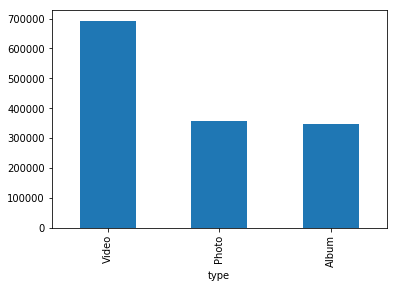

In [84]:
df.groupby('type').engagements.mean().sort_values(ascending = False).plot(kind='bar')
plt.show()

In [86]:
condition = [df['type'] == 'Video', df['type'] == 'Photo', df['type'] == 'Album']
choices = [0, 1, 2]
df['mode'] = np.select(condition,choices, default=0)

In [87]:
df.groupby('month').engagements.mean().sort_values(ascending = False)

month
10    633606.762274
11    624775.817958
2     619607.003236
1     612886.020234
12    599516.759116
3     591343.003359
5     585390.120280
8     557815.286486
6     550238.185771
4     548784.717975
9     516251.740506
7     454612.682203
Name: engagements, dtype: float64

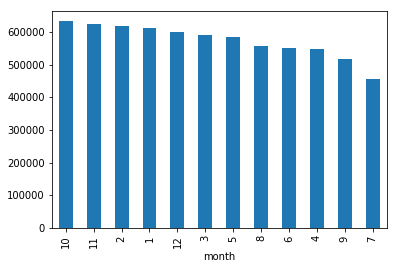

In [88]:
df.groupby('month').engagements.mean().sort_values(ascending = False).plot(kind='bar')
plt.show()

In [89]:
df.groupby('dow').engagements.mean().sort_values(ascending = False)

dow
Sunday       619478.932753
Saturday     602628.162011
Thursday     591583.637002
Tuesday      584399.959024
Wednesday    584079.907767
Monday       577110.030682
Friday       576476.109390
Name: engagements, dtype: float64

In [90]:
df.groupby('hour').engagements.mean().sort_values(ascending = False)


hour
10    656116.409091
1     641541.109548
0     638217.819648
2     628475.402256
9     619663.647059
23    616103.192000
3     612551.440919
4     611810.508527
21    580841.699275
7     578171.961039
22    573601.003086
20    570215.922414
5     566477.138009
8     553428.869565
19    543269.152838
12    520637.045872
13    515745.283019
18    514380.009302
15    513843.924855
6     508259.122530
17    506538.545455
14    504787.893939
16    492528.167488
11    472613.810811
Name: engagements, dtype: float64

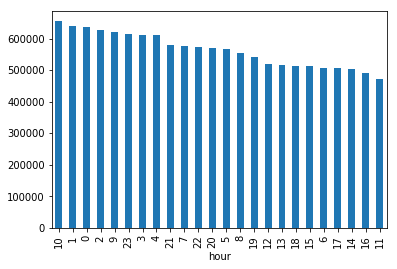

In [91]:
df.groupby('hour').engagements.mean().sort_values(ascending = False).plot(kind='bar')
plt.show()

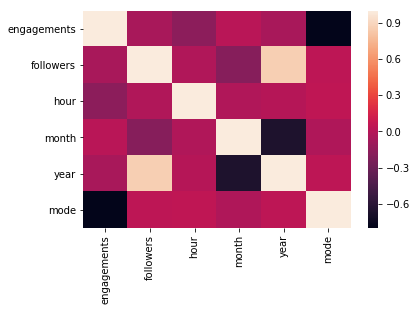

In [95]:
col = ['engagements','followers', 'hour', 'dow', 'month', 'year', 'mode']
sns.heatmap(df[col].corr())

In [67]:
df.corr()

,engagements,followers at posting,followers,year,month,hour
engagements,1.000000,-0.053031,-0.053031,-0.054113,0.020518,-0.161807
followers at posting,-0.053031,1.000000,1.000000,0.862747,-0.191020,-0.013677
followers,-0.053031,1.000000,1.000000,0.862747,-0.191020,-0.013677
year,-0.054113,0.862747,0.862747,1.000000,-0.652998,0.002447
month,0.020518,-0.191020,-0.191020,-0.652998,1.000000,-0.014950
hour,-0.161807,-0.013677,-0.013677,0.002447,-0.014950,1.000000


In [55]:
df.groupby('year').engagements.mean().sort_values(ascending = False)

year
2017    614684.750909
2018    592044.685997
2019    581751.003157
Name: engagements, dtype: float64